In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn import tree

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
credit_df=pd.read_csv('../Resources/credit_record.csv', index_col="ID")
application_df=pd.read_csv('../Resources/application_record.csv', index_col="ID")

In [3]:
credit_df.head()

MONTHS_BALANCE STATUS
ID                            
5001711               0      X
5001711              -1      0
5001711              -2      0
5001711              -3      0
5001712               0      C

In [4]:
application_df.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
ID                                                               
5008804           M            Y               Y             0   
5008805           M            Y               Y             0   
5008806           M            Y               Y             0   
5008808           F            N               Y             0   
5008809           F            N               Y             0   

         AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
ID                                                
5008804          427500.0               Working   
5008805          427500.0               Working   
5008806          112500.0               Working   
5008808          270000.0  Commercial associate   
5008809          270000.0  Commercial associate   

                   NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
ID                                                             
5008804               Higher education        Civil marriage   
5008805               Higher education        Civil marriage   
5008806  Secondary / secondary special               Married   
5008808  Secondary / secondary special  Single / not married   
5008809  Secondary / secondary special  Single / not married   

         NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
ID                                                                  
5008804   Rented apartment      -12005          -4542           1   
5008805   Rented apartment      -12005          -4542           1   
5008806  House / apartment      -21474          -1134           1   
5008808  House / apartment      -19110          -3051           1   
5008809  House / apartment      -19110          -3051           1   

         FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
ID                                                                 
5008804                1           0           0             NaN   
5008805                1           0           0             NaN   
5008806                0           0           0  Security staff   
5008808                0           1           1     Sales staff   
5008809                0           1           1     Sales staff   

         CNT_FAM_MEMBERS  
ID                        
5008804              2.0  
5008805              2.0  
5008806              2.0  
5008808              1.0  
5008809              1.0

In [5]:
grouped=credit_df.groupby('ID')['STATUS'].value_counts()
grouped

ID       STATUS
5001711  0          3
         X          1
5001712  0         10
         C          9
5001713  X         22
                   ..
5150483  X         18
5150484  0         12
         C          1
5150485  0          2
5150487  C         30
Name: count, Length: 94143, dtype: int64

In [6]:
credit_grouped=pd.get_dummies(data=credit_df,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(credit_df['STATUS'].unique().tolist())].sum()
credit_grouped=credit_grouped.rename(columns=
                      {'0':'pastdue_1_29',
                       '1':'pastdue_30_59',
                       '2':'pastdue_60_89',
                       '3':'pastdue_90_119',
                       '4':'pastdue_120_149',
                       '5':'pastdue_over_150',
                       'C':'paid_off',
                       'X':'no_loan',
                      })

credit_grouped['number_of_months']=credit_df.groupby('ID')['MONTHS_BALANCE'].count()
credit_grouped

pastdue_1_29  pastdue_30_59  pastdue_60_89  pastdue_90_119  \
ID                                                                    
5001711             3              0              0               0   
5001712            10              0              0               0   
5001713             0              0              0               0   
5001714             0              0              0               0   
5001715             0              0              0               0   
...               ...            ...            ...             ...   
5150482            12              0              0               0   
5150483             0              0              0               0   
5150484            12              0              0               0   
5150485             2              0              0               0   
5150487             0              0              0               0   

         pastdue_120_149  pastdue_over_150  paid_off  no_loan  \
ID                                                              
5001711                0                 0         0        1   
5001712                0                 0         9        0   
5001713                0                 0         0       22   
5001714                0                 0         0       15   
5001715                0                 0         0       60   
...                  ...               ...       ...      ...   
5150482                0                 0         6        0   
5150483                0                 0         0       18   
5150484                0                 0         1        0   
5150485                0                 0         0        0   
5150487                0                 0        30        0   

         number_of_months  
ID                         
5001711                 4  
5001712                19  
5001713                22  
5001714                15  
5001715                60  
...                   ...  
5150482                18  
5150483                18  
5150484                13  
5150485                 2  
5150487                30  

[45985 rows x 9 columns]

In [7]:
credit_grouped['pastdue_60_89'].value_counts()

pastdue_60_89
0    45388
1      435
2      100
3       39
4       12
5        4
6        3
8        2
7        2
Name: count, dtype: int64

In [8]:
credit_grouped['pastdue_30_59'].value_counts()

pastdue_30_59
0     40784
1      2888
2      1110
3       470
4       268
5       143
6        94
7        63
8        53
9        30
10       23
13       17
11       13
12        8
16        6
15        4
14        2
19        2
18        1
31        1
21        1
27        1
38        1
22        1
17        1
Name: count, dtype: int64

In [9]:
credit_grouped['customer_status'] = credit_grouped['pastdue_30_59'].apply(lambda x: 1 if x > 0 else 0)
credit_grouped

pastdue_1_29  pastdue_30_59  pastdue_60_89  pastdue_90_119  \
ID                                                                    
5001711             3              0              0               0   
5001712            10              0              0               0   
5001713             0              0              0               0   
5001714             0              0              0               0   
5001715             0              0              0               0   
...               ...            ...            ...             ...   
5150482            12              0              0               0   
5150483             0              0              0               0   
5150484            12              0              0               0   
5150485             2              0              0               0   
5150487             0              0              0               0   

         pastdue_120_149  pastdue_over_150  paid_off  no_loan  \
ID                                                              
5001711                0                 0         0        1   
5001712                0                 0         9        0   
5001713                0                 0         0       22   
5001714                0                 0         0       15   
5001715                0                 0         0       60   
...                  ...               ...       ...      ...   
5150482                0                 0         6        0   
5150483                0                 0         0       18   
5150484                0                 0         1        0   
5150485                0                 0         0        0   
5150487                0                 0        30        0   

         number_of_months  customer_status  
ID                                          
5001711                 4                0  
5001712                19                0  
5001713                22                0  
5001714                15                0  
5001715                60                0  
...                   ...              ...  
5150482                18                0  
5150483                18                0  
5150484                13                0  
5150485                 2                0  
5150487                30                0  

[45985 rows x 10 columns]

In [10]:
merged_df = pd.merge(credit_grouped[["customer_status"]], application_df, how='inner', left_index=True, right_index=True)

In [11]:
merged_df

customer_status CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
ID                                                                  
5008804                1           M            Y               Y   
5008805                1           M            Y               Y   
5008806                0           M            Y               Y   
5008808                0           F            N               Y   
5008809                0           F            N               Y   
...                  ...         ...          ...             ...   
5150482                0           F            Y               Y   
5150483                0           F            Y               Y   
5150484                0           F            Y               Y   
5150485                0           F            Y               Y   
5150487                0           M            Y               N   

         CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
ID                                                              
5008804             0          427500.0               Working   
5008805             0          427500.0               Working   
5008806             0          112500.0               Working   
5008808             0          270000.0  Commercial associate   
5008809             0          270000.0  Commercial associate   
...               ...               ...                   ...   
5150482             1          157500.0               Working   
5150483             1          157500.0               Working   
5150484             1          157500.0               Working   
5150485             1          157500.0               Working   
5150487             0          202500.0               Working   

                   NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
ID                                                             
5008804               Higher education        Civil marriage   
5008805               Higher education        Civil marriage   
5008806  Secondary / secondary special               Married   
5008808  Secondary / secondary special  Single / not married   
5008809  Secondary / secondary special  Single / not married   
...                                ...                   ...   
5150482  Secondary / secondary special               Married   
5150483  Secondary / secondary special               Married   
5150484  Secondary / secondary special               Married   
5150485  Secondary / secondary special               Married   
5150487  Secondary / secondary special               Married   

         NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
ID                                                                  
5008804   Rented apartment      -12005          -4542           1   
5008805   Rented apartment      -12005          -4542           1   
5008806  House / apartment      -21474          -1134           1   
5008808  House / apartment      -19110          -3051           1   
5008809  House / apartment      -19110          -3051           1   
...                    ...         ...            ...         ...   
5150482  House / apartment      -10808          -1739           1   
5150483  House / apartment      -10808          -1739           1   
5150484  House / apartment      -10808          -1739           1   
5150485  House / apartment      -10808          -1739           1   
5150487  House / apartment      -19398          -2166           1   

         FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
ID                                                                 
5008804                1           0           0             NaN   
5008805                1           0           0             NaN   
5008806                0           0           0  Security staff   
5008808                0           1           1     Sales staff   
5008809                0           1           1     Sales staff   
...                  ...         ...         ...          

In [56]:
# describe merged_df.
merged_df.describe()

customer_status  CNT_CHILDREN  AMT_INCOME_TOTAL    DAYS_BIRTH  \
count     36457.000000  36457.000000      3.645700e+04  36457.000000   
mean          0.113805      0.430315      1.866857e+05 -15975.173382   
std           0.317579      0.742367      1.017892e+05   4200.549944   
min           0.000000      0.000000      2.700000e+04 -25152.000000   
25%           0.000000      0.000000      1.215000e+05 -19438.000000   
50%           0.000000      0.000000      1.575000e+05 -15563.000000   
75%           0.000000      1.000000      2.250000e+05 -12462.000000   
max           1.000000     19.000000      1.575000e+06  -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE    FLAG_PHONE    FLAG_EMAIL  \
count   36457.000000     36457.0     36457.000000  36457.000000  36457.000000   
mean    59262.935568         1.0         0.225526      0.294813      0.089722   
std    137651.334859         0.0         0.417934      0.455965      0.285787   
min    -15713.000000         1.0         0.000000      0.000000      0.000000   
25%     -3153.000000         1.0         0.000000      0.000000      0.000000   
50%     -1552.000000         1.0         0.000000      0.000000      0.000000   
75%      -408.000000         1.0         0.000000      1.000000      0.000000   
max    365243.000000         1.0         1.000000      1.000000      1.000000   

       CNT_FAM_MEMBERS  
count     36457.000000  
mean          2.198453  
std           0.911686  
min           1.000000  
25%           2.000000  
50%           2.000000  
75%           3.000000  
max          20.000000

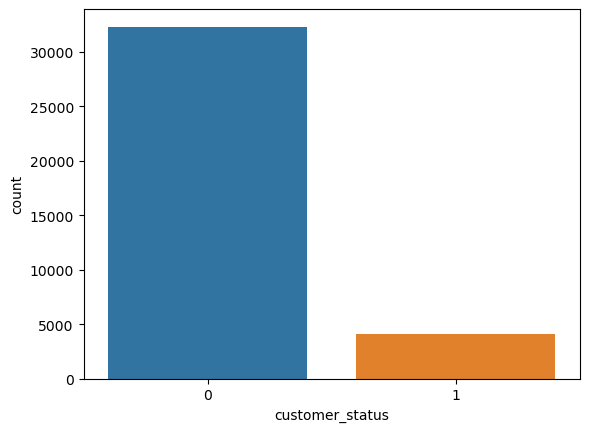

In [58]:
sns.countplot(x='customer_status', data = merged_df)
plt.show()

#### Create the labels set (y) from the “customer_status” column, and then create the features (X) DataFrame from the remaining columns.

In [12]:
# Separate the data into labels and features

# Separate the y variable, the 
y = merged_df['customer_status']
display(y.head())


ID
5008804    1
5008805    1
5008806    0
5008808    0
5008809    0
Name: customer_status, dtype: int64

In [38]:
X = pd.get_dummies(merged_df, columns=['CODE_GENDER','FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'],dtype=int)

X.head()

# Separate the X variable, the features
X = merged_df.drop(columns=['customer_status'])
X.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
ID                                                               
5008804           M            Y               Y             0   
5008805           M            Y               Y             0   
5008806           M            Y               Y             0   
5008808           F            N               Y             0   
5008809           F            N               Y             0   

         AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
ID                                                
5008804          427500.0               Working   
5008805          427500.0               Working   
5008806          112500.0               Working   
5008808          270000.0  Commercial associate   
5008809          270000.0  Commercial associate   

                   NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
ID                                                             
5008804               Higher education        Civil marriage   
5008805               Higher education        Civil marriage   
5008806  Secondary / secondary special               Married   
5008808  Secondary / secondary special  Single / not married   
5008809  Secondary / secondary special  Single / not married   

         NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
ID                                                                  
5008804   Rented apartment      -12005          -4542           1   
5008805   Rented apartment      -12005          -4542           1   
5008806  House / apartment      -21474          -1134           1   
5008808  House / apartment      -19110          -3051           1   
5008809  House / apartment      -19110          -3051           1   

         FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
ID                                                                 
5008804                1           0           0             NaN   
5008805                1           0           0             NaN   
5008806                0           0           0  Security staff   
5008808                0           1           1     Sales staff   
5008809                0           1           1     Sales staff   

         CNT_FAM_MEMBERS  
ID                        
5008804              2.0  
5008805              2.0  
5008806              2.0  
5008808              1.0  
5008809              1.0

####  Check the balance of the labels variable (y) by using the value_counts function.

In [14]:
# Check the balance of our target values
y.value_counts()

customer_status
0    32308
1     4149
Name: count, dtype: int64

#### Split the data into training and testing datasets by using train_test_split.

In [15]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# Standardize the feature using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Create a Logistic Regression Model with the Original Data

#### Step 1: Fit a logistic regression model by using the training data (X_train_scaled and y_train)

In [17]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 42 to the models

logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_regression_model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=1)

#### Step 2: Save the predictions on the testing data labels by using the testing feature data (X_test_scaled) and the fitted model.

In [18]:
# Make a prediction using the testing data
testing_predictions = logistic_regression_model.predict(X_test_scaled)
print(len(testing_predictions))

9115


#### Step 3: Evaluate the model’s performance by doing the following:
        
        * Calculate the accuracy score of the model
        
        * Generate the confusion matrix
        
        * Print the classification report.

In [19]:
# Print the balanced_accuracy score of the model

logistic_acc_score = balanced_accuracy_score(y_test, testing_predictions)
print(logistic_acc_score)

0.5008885586840136


In [20]:
# Generate a confusion matrix for the model

confusion_test_matrix = confusion_matrix(y_test, testing_predictions)
confusion_test_matrix

array([[8062,    1],
       [1050,    2]], dtype=int64)

In [21]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8063
           1       0.67      0.00      0.00      1052

    accuracy                           0.88      9115
   macro avg       0.78      0.50      0.47      9115
weighted avg       0.86      0.88      0.83      9115



Text(0.5, 1.0, 'Confustion Matrix')

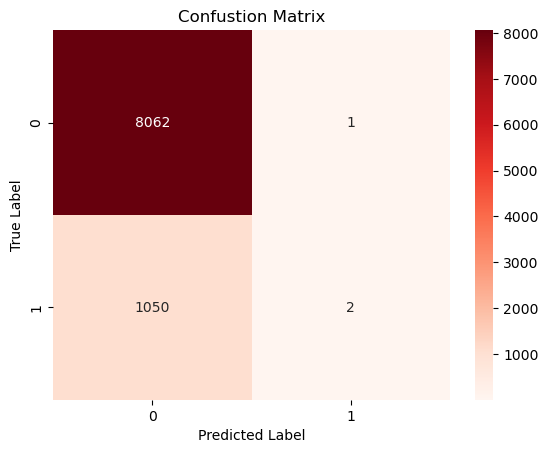

In [90]:
# Plot confusion matrix heatmap
#plt.figure(figsize=(8,6))
sns.heatmap(confusion_test_matrix,cmap='Reds',annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confustion Matrix')


#### Predict a Logistic Regression Model with Resampled Training Data

#### Step 1: Use the RandomOverSampler module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points.

In [22]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler_model = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_res, y_res =random_oversampler_model.fit_resample(X_train, y_train)

In [23]:
# Count the distinct values of the resampled lables data.random_oversampler_model
y_res.value_counts()

customer_status
0    24245
1    24245
Name: count, dtype: int64

In [24]:
# Standardize the feature using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.fit_transform(X_test)

#### Step 2: Use the LogisticRegression classifier and the resampled data to fit the model and make predictions.

In [29]:
# Instantiate the Logistic Regression model
logistic_regression_model_resampled = LogisticRegression(random_state=1)
logistic_regression_model_resampled

# Fit the model using the resampled training data
logistic_regression_model_resampled.fit(X_train_scaled, y_res)

# Make a prediction using the testing data
y_pred = logistic_regression_model_resampled.predict(X_test_scaled)

#### Step 3: Evaluate the model’s performance by doing the following:
            
            * Calculate the accuracy score of the model.

            * Generate a confusion matrix.

            * Print the classification report.

In [30]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, y_pred)

0.5361763753030437

In [31]:
# Generate a confusion matrix for the model
confusion_matrix_resampled = confusion_matrix(y_test, y_pred)
print(confusion_matrix_resampled)

[[4201 3862]
 [ 472  580]]


In [32]:
classification_report_resampled = classification_report_imbalanced(y_test, y_pred)
print(classification_report_resampled)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.52      0.55      0.66      0.54      0.29      8063
          1       0.13      0.55      0.52      0.21      0.54      0.29      1052

avg / total       0.81      0.52      0.55      0.61      0.54      0.29      9115



Text(0.5, 1.0, 'Confustion Matrix Resampled')

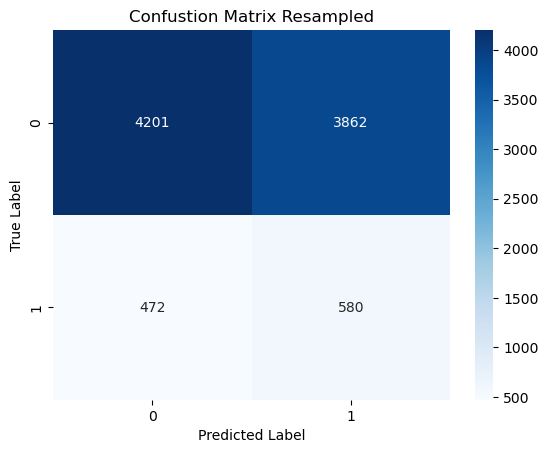

In [95]:
# Plot confusion matrix resampled heatmap

sns.heatmap(confusion_matrix_resampled,cmap='Blues',annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confustion Matrix Resampled')

####  Fitting the Decision Tree Model

In [44]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

# Fitting the model
model = model.fit(X_train_scaled, y_train)

#### Making Predictions Using the Tree Model


In [46]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

#### Model Evaluation


In [48]:
# Displaying classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.84      0.86      8063
           1       0.16      0.25      0.20      1052

    accuracy                           0.77      9115
   macro avg       0.53      0.54      0.53      9115
weighted avg       0.81      0.77      0.79      9115



#### Visualizing the Decision Tree


In [53]:
# Create DOT data
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=["0","1"], filled= True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


(process:24676): GLib-GIO-WARNING **: 12:12:54.809: Unexpectedly, UWP app `HaukeGtze.7-ZipFileManagerUnofficial_1.2201.1.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.7-ZipFileManagerUnofficial_6bk20wvc8rfx2!zFM.exe') supports 36 extensions but has no verbs

(process:24676): GLib-GIO-WARNING **: 12:12:55.671: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:24676): GLib-GIO-WARNING **: 12:12:55.798: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2310.54.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.230049 to fit

